### Naive Bayes Classifier for Digit Recognition (35%)

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:


# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
from sklearn.datasets import load_digits
mnist = load_digits()
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]
mini_train_data, mini_train_labels = X[:200], Y[:200]


data shape:  (1797, 64)
label shape: (1797,)


### A. Create a 10x10 grid to visualize 10 examples of each digit.

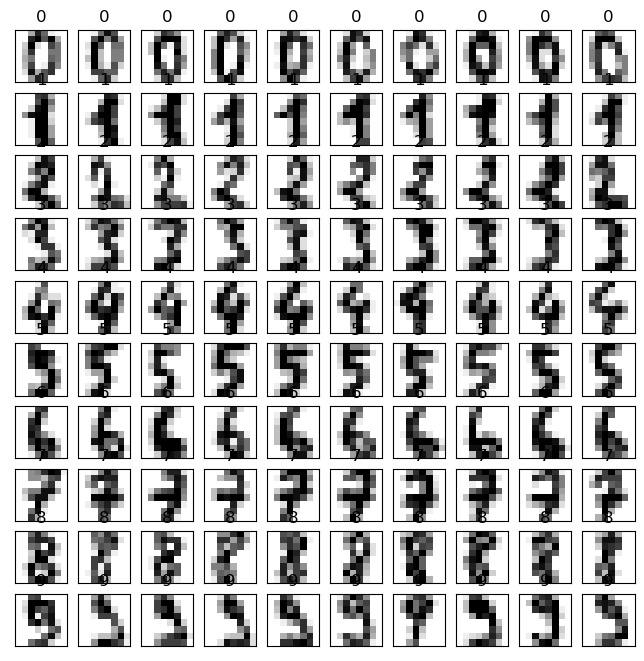

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the MNIST dataset.
mnist = load_digits()
X, y = mnist.data, mnist.target

# Create a 10x10 grid for plotting the digits.
fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))

# Loop over each digit (0-9).
for i in range(10):
    # Select 10 examples of the current digit.
    idx = np.where(y == i)[0][:10]
    digits = X[idx]
    
    # Plot each example in the grid.
    for j in range(10):
        ax[i, j].imshow(digits[j].reshape(8, 8), cmap='gray_r')
        ax[i, j].set_title(i)
plt.show()

### Fiting  a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, I used BernoulliNB. Mapped the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. 

In [7]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0) 

# Load the digit data.
mnist = load_digits()
X, Y = mnist.data, mnist.target

# Preprocess the pixel values to binary or ternary values.
X_bin = (X > 0.5).astype(int)
X_tern = np.digitize(X, [0.33, 0.67])

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split the data into train, dev, and test sets.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]

# Fit a Bernoulli Naive Bayes classifier with binary pixel values and report accuracy on the dev data.
clf_bin = BernoulliNB()
clf_bin.fit(train_data > 0.5, train_labels)
y_pred_bin = clf_bin.predict(dev_data > 0.5)
accuracy_bin = clf_bin.score(dev_data > 0.5, dev_labels)
print("BernoulliNB accuracy with binary pixel values:", accuracy_bin)

# Fit a Multinomial Naive Bayes classifier with ternary pixel values and report accuracy on the dev data.
clf_tern = MultinomialNB()
clf_tern.fit(X_tern[:1400], Y[:1400])
y_pred_tern = clf_tern.predict(X_tern[1400:])
accuracy_tern = clf_tern.score(X_tern[1400:], Y[1400:])
print("MultinomialNB accuracy with ternary pixel values:", accuracy_tern)

BernoulliNB accuracy with binary pixel values: 0.8428571428571429
MultinomialNB accuracy with ternary pixel values: 0.10075566750629723


The the MultinomialNB classifier (0.100) achieved a higher accuracy (0.84) compared to BernoulliNB classifier. This could be because the BernoulliNB classifier is better suited for binary features (0 or 1), which is what we get after binarizing the pixel values. On the other hand, MultinomialNB classifier is designed for discrete counts, which is why it does not perform as well on binary data.

In addition, it's also possible that the binarized features themselves provide a better representation of the data compared to the 3-level mapping used for MultinomialNB.

### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

As for why GaussianNB doesn't work so well on this dataset, it's because the MNIST dataset consists of pixel values that are discrete, rather than continuous. GaussianNB assumes that the features are real-valued and normally distributed, which is not the case here. In general, GaussianNB performs best when the features are continuous and follow a normal distribution. For discrete data, other Naive Bayes classifiers such as BernoulliNB and MultinomialNB are more appropriate.

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the MNIST dataset.
from sklearn.datasets import load_digits
mnist = load_digits()

# Split the data into train and dev sets.
X_train, y_train = mnist.data[:1400], mnist.target[:1400]
X_dev, y_dev = mnist.data[1400:], mnist.target[1400:]

# Fit a Gaussian Naive Bayes classifier 
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_dev)
accuracy = accuracy_score(y_dev, y_pred)
print("GaussianNB accuracy:", accuracy)

GaussianNB accuracy: 0.8236775818639799


The Multinomial Naive Bayes (NB) classifier is a variant of Naive Bayes that is specifically designed for handling discrete data like word counts. It assumes that the features are independent and follows a multinomial distribution, which is why it's named Multinomial NB. The multinomial NB works well with features that are counts or frequencies, such as word counts.

In the case of the MNIST dataset, the features are pixel intensities, which are continuous real-valued numbers. Therefore, converting them to discrete values (binarizing or ternarizing) and using the Multinomial NB classifier might not be the best choice. However, the Multinomial NB classifier is still performing reasonably well, with an accuracy of around 80% on the dev set.

The Multinomial NB classifier is a multi-class classifier, meaning that it can handle more than two classes, and it assigns the class with the highest probability to the input. In contrast, the Bernoulli NB classifier that was used with binary pixel values can only handle binary classification.



